In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [79]:
dosyakonumu = pd.read_csv('../content/drive/MyDrive/heart-disease/heart.csv')

In [80]:
ilk5veri=dosyakonumu.head()
ilk5veri

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
bilgi=dosyakonumu.info()
bilgi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [82]:
tanım=dosyakonumu.describe()
tanım

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [83]:
yasi48_67arasıolanhastasayilari=dosyakonumu.age.value_counts()[:20]
yasi48_67arasıolanhastasayilari

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
Name: age, dtype: int64

<function matplotlib.pyplot.show>

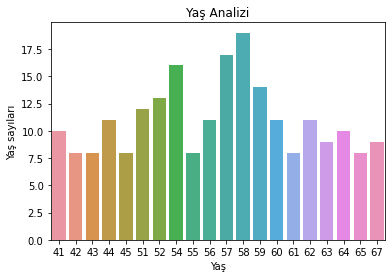

In [84]:
sns.barplot(x= dosyakonumu.age.value_counts()[:20].index, y= dosyakonumu.age.value_counts()[:20].values  )
plt.xlabel('Yaş')
plt.ylabel("Yaş sayıları")
plt.title("Yaş Analizi")
plt.show

In [85]:
hastaolanlarinsayisi = len(dosyakonumu[dosyakonumu.target == 0])
hastaolmayanlarinsayisi = len(dosyakonumu[dosyakonumu.target == 1])
print("Kalp hastalığı olmayan hastaların yüzdesi: {:.2f}%".format((hastaolanlarinsayisi/(len(dosyakonumu.target)))*100))
print("Kalp hastalığı olan hastaların yüzdesi: {:.2f}%".format((hastaolmayanlarinsayisi/(len(dosyakonumu.target)))*100))

Kalp hastalığı olmayan hastaların yüzdesi: 45.54%
Kalp hastalığı olan hastaların yüzdesi: 54.46%


In [86]:
kadinSayisi= len(dosyakonumu[dosyakonumu.sex == 0])
erkekSayisi = len(dosyakonumu[dosyakonumu.sex == 1])
print("Kadın Hasta Yüzdesi: {:.2f}%".format((kadinSayisi/(len(dosyakonumu.sex))*100)))
print("Erkek Hasta Yüzdesi: {:.2f}%".format((erkekSayisi/(len(dosyakonumu.sex))*100)))

Kadın Hasta Yüzdesi: 31.68%
Erkek Hasta Yüzdesi: 68.32%


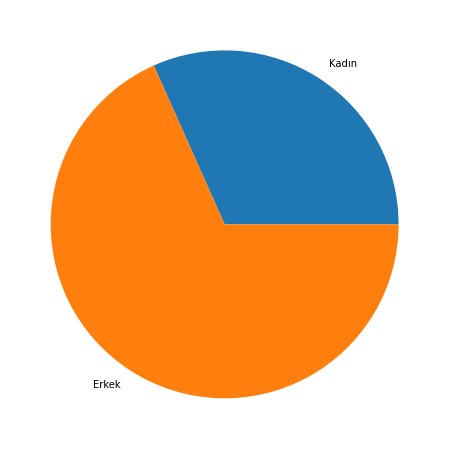

In [87]:
renkler = ['blue','green',]
explode= [1,1,1]
plt.figure(figsize= (8,8))
plt.pie([kadinSayisi, erkekSayisi ], labels=['Kadın', 'Erkek'])
plt.show()

In [99]:
Aclik_kan_sekeri_120ustu=dosyakonumu[(dosyakonumu.fbs==1)]
Aclik_kan_sekeri_120alti=dosyakonumu[(dosyakonumu.fbs==0)]
print("Aclik_kan_sekeri_120ustu", len(Aclik_kan_sekeri_120ustu))
print("Aclik_kan_sekeri_120alti", len(Aclik_kan_sekeri_120alti))


Aclik_kan_sekeri_120ustu 45
Aclik_kan_sekeri_120alti 258


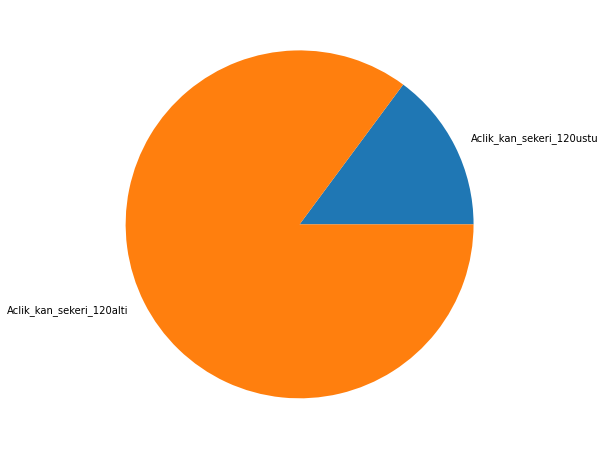

In [100]:
renkler = ['blue','green',]
explode= [1,1,1]
plt.figure(figsize= (8,8))
plt.pie([len(Aclik_kan_sekeri_120ustu), len(Aclik_kan_sekeri_120alti), ], labels=['Aclik_kan_sekeri_120ustu', 'Aclik_kan_sekeri_120alti'])
plt.show()

In [90]:
gogus_agrisi_tipi0=dosyakonumu[(dosyakonumu.cp==0)]
gogus_agrisi_tipi1=dosyakonumu[(dosyakonumu.cp==1)]
gogus_agrisi_tipi2=dosyakonumu[(dosyakonumu.cp==2)]
gogus_agrisi_tipi3=dosyakonumu[(dosyakonumu.cp==3)]
print("gogus_agrisi_tipi0", len(gogus_agrisi_tipi0))
print("gogus_agrisi_tipi1", len(gogus_agrisi_tipi1))
print("gogus_agrisi_tipi2", len(gogus_agrisi_tipi2))
print("gogus_agrisi_tipi3", len(gogus_agrisi_tipi3))

gogus_agrisi_tipi0 143
gogus_agrisi_tipi1 50
gogus_agrisi_tipi2 87
gogus_agrisi_tipi3 23


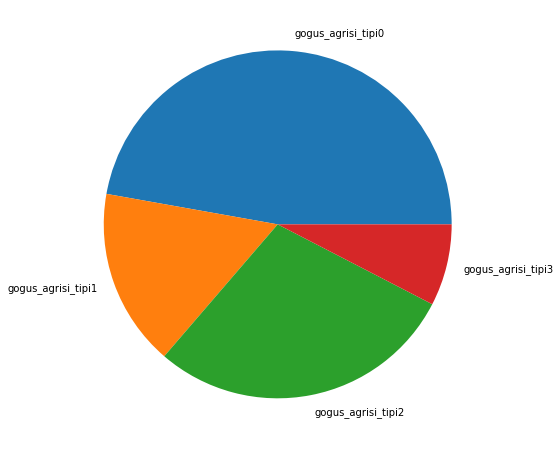

In [98]:
renkler = ['blue','green', 'red','yellow']
explode= [1,1,1]
plt.figure(figsize= (8,8))
plt.pie([len(gogus_agrisi_tipi0), len(gogus_agrisi_tipi1), len(gogus_agrisi_tipi2),len(gogus_agrisi_tipi3)], labels=['gogus_agrisi_tipi0', 'gogus_agrisi_tipi1', 'gogus_agrisi_tipi2','gogus_agrisi_tipi3'])
plt.show()

In [92]:
genc_yas = dosyakonumu[(dosyakonumu.age>=29)&(dosyakonumu.age<40)]
orta_yas = dosyakonumu[(dosyakonumu.age>=40)&(dosyakonumu.age<55)]
yasli = dosyakonumu[(dosyakonumu.age>=55)]
print("genc_yas", len(genc_yas))
print("orta_yas", len(orta_yas))
print("yasli", len(yasli))

genc_yas 16
orta_yas 128
yasli 159


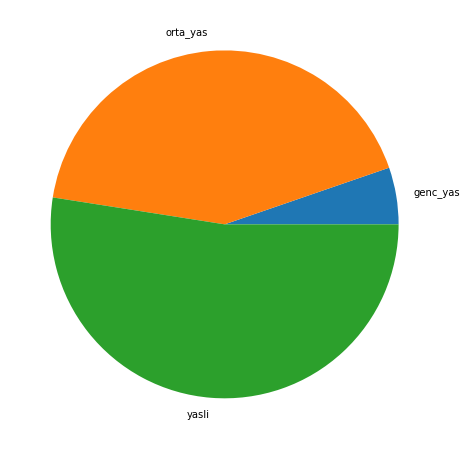

In [93]:
renkler = ['blue','green', 'red']
explode= [1,1,1]
plt.figure(figsize= (8,8))
plt.pie([len(genc_yas), len(orta_yas), len(yasli)], labels=['genc_yas', 'orta_yas', 'yasli'])
plt.show()

In [94]:
dosyakonumu.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [122]:
from sklearn.linear_model import LogisticRegression
x_data = dosyakonumu.drop(['target'], axis = 1)
y = dosyakonumu.target.values

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.2, random_state= 0)

[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1]
[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]
y_test[ 0 ]= 0 tahmin[ 0 ]= 0  dogru tahmin etmis
y_test[ 1 ]= 1 tahmin[ 1 ]= 1  dogru tahmin etmis
y_test[ 2 ]= 0 tahmin[ 2 ]= 1  yanlis tahmin etmis
y_test[ 3 ]= 0 tahmin[ 3 ]= 0  dogru tahmin etmis
y_test[ 4 ]= 1 tahmin[ 4 ]= 0  yanlis tahmin etmis
y_test[ 5 ]= 0 tahmin[ 5 ]= 0  dogru tahmin etmis
y_test[ 6 ]= 0 tahmin[ 6 ]= 0  dogru tahmin etmis
y_test[ 7 ]= 0 tahmin[ 7 ]= 0  dogru tahmin etmis
y_test[ 8 ]= 0 tahmin[ 8 ]= 0  dogru tahmin etmis
y_test[ 9 ]= 0 tahmin[ 9 ]= 0  dogru tahmin etmis
y_test[ 10 ]= 1 tahmin[ 10 ]= 1  dogru tahmin etmis
y_test[ 11 ]= 1 tahmin[ 11 ]= 1  dogru tahmin etmis
y_test[ 12 ]= 0 tahmin[ 12 ]= 0  dogru tahmin etmis
y_test[ 13 ]= 1 tahmin[ 13 ]= 1  dogru tahmin etmis
y_test[ 14 ]= 1 tahmin[ 14 ]= 1  dogru t

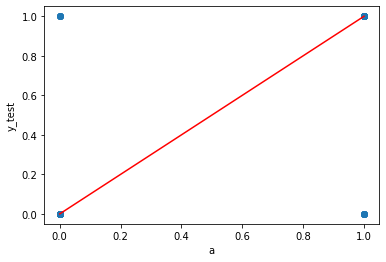

In [130]:
lr = LogisticRegression()

lr.fit(x_train, y_train)

a=lr.predict(x_test)
print(y_test)
print(a)
n1=np.array(a)
n2=np.array(y_test)
line1=np.array([0,1])
line2=np.array([0,1])
plt.xlabel("a")
plt.ylabel("y_test")
plt.scatter(n1,n2)
plt.plot(line1,line2,color='red')
plt.show
dogru=0
yanlis=0
for i in range(len(y_test)):
  if(y_test[i]==a[i]):
    print("y_test[",i,"]=",y_test[i],"tahmin[",i,"]=",a[i]," dogru tahmin etmis")
    dogru+=1
  else:
    print("y_test[",i,"]=",y_test[i],"tahmin[",i,"]=",a[i]," yanlis tahmin etmis")
    yanlis+=1
print("Dogru Tahmin adedi:",dogru)
print("Yanlis Tahmin adedi:",yanlis)
print('Test Accuracy {:.2f}%'.format(lr.score(x_test, y_test)*100))
